# Visualize Author Gender By Year (Solution)

# Import pandas

In [1]:
import pandas as pd

# Read in CSV

In [2]:
aa_df = pd.read_csv("https://raw.githubusercontent.com/melaniewalsh/responsible-datasets-in-context/main/datasets/aa-periodical-poetry/African-American-Periodical-Poetry_1900-1928.-Created-by-Amardeep-Singh-and-Kate-Hennessey,-Lehigh-University.-Revised-Version-July-2024.csv",  quotechar='"', escapechar='\\')

# View first 5 rows

In [3]:
aa_df.head()

# Convert year to datetime value

In [4]:
aa_df['year'] = pd.to_datetime(aa_df['year'], format = "%Y")

#aa_df.set_index('year').reindex(pd.date_range('1900-01-01', '1930-12-31', freq='Y'))
      
# Sort years and return unique years to check for missing data
aa_df['year'].sort_values().unique()

<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

It looks like we have some missing year values… we may need to add them
back in shortly.

# Group by year, count instances of author by gender

In [5]:
aa_df.groupby('year')['gender (if known)'].value_counts()

Series([], Name: count, dtype: int64)

# Make this grouping into a dataframe

In [6]:
aa_gender_by_year = aa_df.groupby('year')['gender (if known)'].value_counts().reset_index()

#aa_gender_by_year['year'] = aa_gender_by_year['year'].astype(int)

aa_gender_by_year

# Add missing years

In [7]:
# Create a dataframe with a complete range of years from 1900 to 1930
years = pd.DataFrame({'year': pd.date_range(start='1900', end='1930', freq='YS')})

# Merge with existing dataframe
aa_gender_by_year = pd.merge(years, aa_gender_by_year, on='year', how='left')

# Fill NaN values
#aa_gender_by_year['gender (if known)'] = aa_gender_by_year['gender (if known)'].fillna("no author recorded")

#aa_gender_by_year['count'] = aa_gender_by_year['count'].fillna(0)


# Sort years and return unique years to check for missing data
aa_gender_by_year['year'].sort_values().unique()

aa_gender_by_year

# Visualize with seaborn

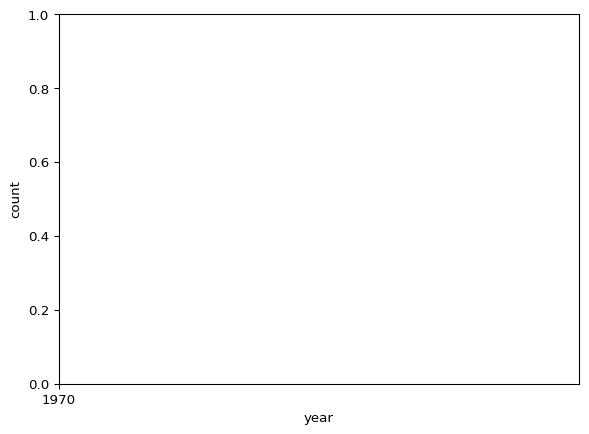

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create the line plot
ax = sns.lineplot(data=aa_gender_by_year, x="year", y="count", hue="gender (if known)")

# Set x-axis major ticks to every 5 years
ax.xaxis.set_major_locator(mdates.YearLocator(5))

# Format the x-axis labels to show the year only
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


/var/folders/06/y6vmvyfj0wg08vb3rszcfy080000gn/T/ipykernel_62722/3665439903.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


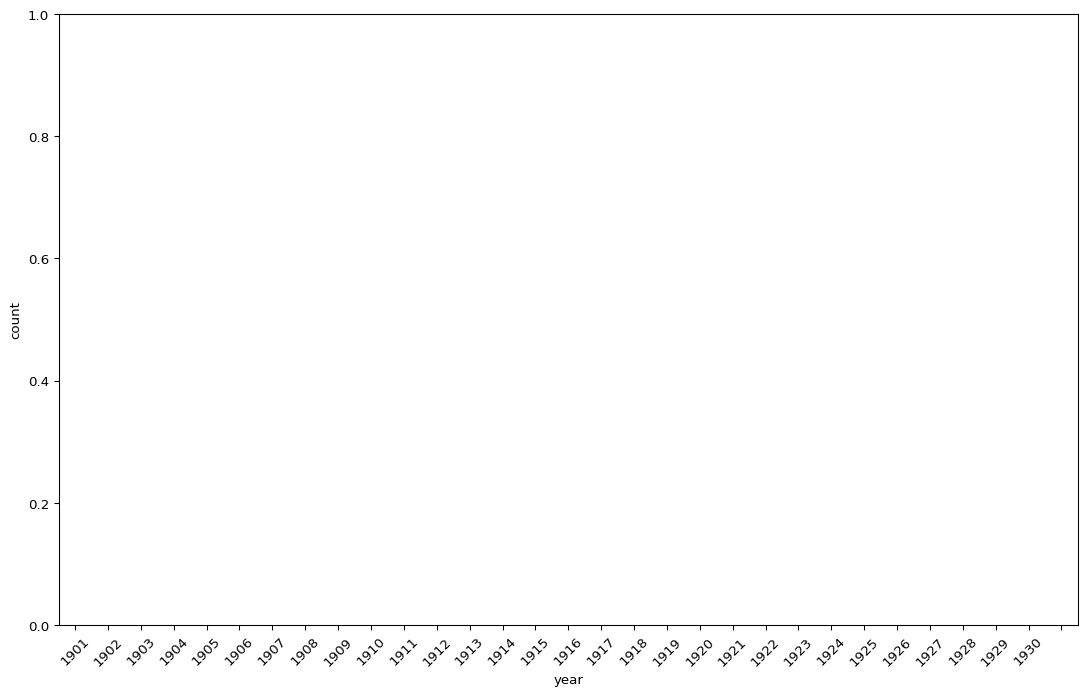

In [9]:
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(13.7, 8.27))

# Create the bar plot
ax = sns.barplot(data=aa_gender_by_year, 
# pull out just the year
x=aa_gender_by_year["year"].dt.year, y="count", hue="gender (if known)")

# Set x-axis major ticks every 1 year
ax.xaxis.set_major_locator(MultipleLocator(1))

# Set x-axis labels to the desired format (only show every 5th year)
ax.set_xticklabels([date.year for date in pd.date_range(start='1900', end='1930', freq='YS')], rotation=45)

plt.show()

# Make interactive visualizations with plotly

In [10]:
import plotly.express as px

# Create the interactive line plot with Plotly
fig = px.line(aa_gender_by_year, 
              x='year', 
              y='count', 
              color='gender (if known)',
              title='Author Gender by Year')
fig.show()

In [11]:
fig = px.bar(aa_gender_by_year, 
             x='year', 
             y='count', 
             color='gender (if known)',
             title='Gender Count by Year')


fig.show()